## ASSIGNMENT 3: CLASSIFICATION AND REGRESSION

## PART A:REGRESSION

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the input file
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


#### Question 1:
Display the information about the dataset including the column names, data types, number of entries

In [4]:
# write code here
print("Dataset infromation:",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
Dataset infromation: None


In [5]:
#cloumns
print("column name:",df.columns)

column name: Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')


In [6]:
#size
print("Dataset size:",df.shape)

Dataset size: (30, 3)


#### Question 2:
Check for null values in the dataset

In [7]:
# write code here
print("Number of numll values\n:", df.isna().sum())

Number of numll values
: Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


####  no null values

#### Question 3:
Check for any duplicate values in the dataset

In [8]:
# duplicate values by row rows
print("Number of duplicate rows:", df.duplicated().sum())

# duplicate rows if any exist
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("\nDuplicate rows found:")
    print(duplicates)
else:
    print("\nNo duplicate rows found.")

# duplicate values in specific columns
print("-"*50)
print("\nDuplicate check by column:")
print(f"Duplicate YearsExperience values: {df['YearsExperience'].duplicated().sum()}")
print(f"Duplicate Salary values: {df['Salary'].duplicated().sum()}")

# duplicate values in each column
print("-"*50)
print("\nDuplicate YearsExperience values:")
duplicate_experience = df[df['YearsExperience'].duplicated(keep=False)].sort_values('YearsExperience')
print(duplicate_experience)


print("-"*50)
print("\nDuplicate Salary values:")
duplicate_salary = df[df['Salary'].duplicated(keep=False)].sort_values('Salary')
print(duplicate_salary)


Number of duplicate rows: 0

No duplicate rows found.
--------------------------------------------------

Duplicate check by column:
Duplicate YearsExperience values: 2
Duplicate Salary values: 0
--------------------------------------------------

Duplicate YearsExperience values:
    Unnamed: 0  YearsExperience   Salary
7            7              3.3  54446.0
8            8              3.3  64446.0
11          11              4.1  55795.0
12          12              4.1  56958.0
--------------------------------------------------

Duplicate Salary values:
Empty DataFrame
Columns: [Unnamed: 0, YearsExperience, Salary]
Index: []


keeping all the data. 
2 duplicate YearsExperience values  - This is normal and expected:

    2 people with 3.3 years experience and different salaries.
    2 people with 4.1 years experience and different salaries.

Multiple people can have same experience but different salarie

#### Question 4:
Fix the columns where null values are there and drop columns only if required

In [9]:
# Remove unnecessary index column
df = df.drop('Unnamed: 0', axis=1)


# Check for missing values
print("\nMissing Values Check:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")



Missing Values Check:
YearsExperience    0
Salary             0
dtype: int64

Total missing values: 0


#### Question 5:
Provide summary statistics for all numerical features


In [10]:
print("Dataset Shape:", df.shape)
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (30, 2)

Basic Statistics:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000


#### Question 6:
Identify the feature and the target variable from the dataset

In [11]:
# feature and target variable
print("Dataset Columns:", df.columns.tolist())
print("\nColumn Analysis:")
print("="*40)

# Feature 
feature = 'YearsExperience'
print(f"FEATURE (X): {feature}")


# Target  
target = 'Salary'
print(f"\n TARGET (y): {target}")

Dataset Columns: ['YearsExperience', 'Salary']

Column Analysis:
FEATURE (X): YearsExperience

 TARGET (y): Salary


#### Question 7:
Plot graph between the feature and the target variable

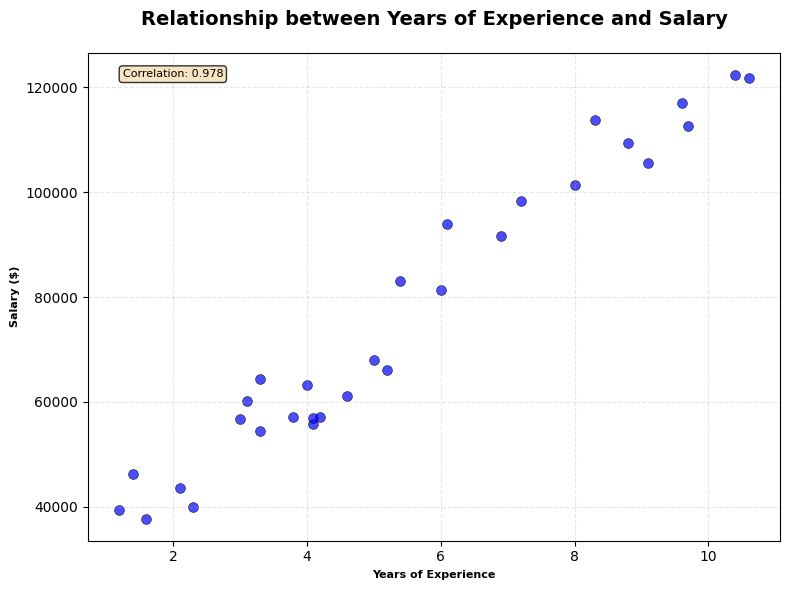

In [12]:
# plots
plt.style.use('default')
sns.set_palette("husl")

# Create the plot
plt.figure(figsize=(8, 6))

# Scatter plot between feature and target
plt.scatter(df['YearsExperience'], df['Salary'], 
           color='blue', alpha=0.7, s=50, edgecolors='black', linewidth=0.5)


plt.xlabel('Years of Experience', fontsize=8, fontweight='bold')
plt.ylabel('Salary ($)', fontsize=8, fontweight='bold')
plt.title('Relationship between Years of Experience and Salary', fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.ticklabel_format(style='plain', axis='y')

# Add statistics to the plot
correlation = df['YearsExperience'].corr(df['Salary'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=8, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))


plt.tight_layout()
plt.show()

In [13]:
# Additional analysis
print("Relationship Analysis:")
print("="*30)
print(f"Correlation coefficient: {correlation:.4f}")

if correlation > 0.7:
    print("Strong positive correlation - Good for linear regression!")
elif correlation > 0.5:
    print(" Moderate positive correlation - Suitable for linear regression")
else:
    print("Weak correlation - Linear regression may not be ideal")

# Show data range
print(f"\nData Range:")
print(f"Experience: {df['YearsExperience'].min():.1f} - {df['YearsExperience'].max():.1f} years")
print(f"Salary: ${df['Salary'].min():,.0f} - ${df['Salary'].max():,.0f}")

Relationship Analysis:
Correlation coefficient: 0.9782
Strong positive correlation - Good for linear regression!

Data Range:
Experience: 1.2 - 10.6 years
Salary: $37,732 - $122,392


In [14]:
from sklearn.model_selection import train_test_split

#### Question 8:
Split the dataset into training and test data


In [15]:
# Prepare variables for modeling
X = df[[feature]]  
y = df[target]     

print(f"\nVariable Shapes:")
print(f"X (feature) shape: {X.shape}")
print(f"y (target) shape: {y.shape}")


Variable Shapes:
X (feature) shape: (30, 1)
y (target) shape: (30,)


In [16]:
# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


print("="*40)
print(f"Training set:")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")

print(f"\nTest set:")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_test shape: {y_test.shape}")

Training set:
  X_train shape: (24, 1)
  y_train shape: (24,)

Test set:
  X_test shape: (6, 1)
  y_test shape: (6,)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

#### Question 9:
Fit and build the Linear Reagression model

In [18]:
# Make predictions on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Training predictions: {len(y_train_pred)} samples")
print(f"Test predictions: {len(y_test_pred)} samples")

Training predictions: 24 samples
Test predictions: 6 samples


#### Question 10:
Print the intercept and the coefficient

In [19]:
#  coefficient 
coefficient = model.coef_[0]
print(f"Coefficient (Slope): {coefficient:.2f}")

# intercept
intercept = model.intercept_
print(f"Intercept: {intercept:.2f}")

Coefficient (Slope): 9423.82
Intercept: 24380.20


#### Question 11:
Plot the regression best fit line

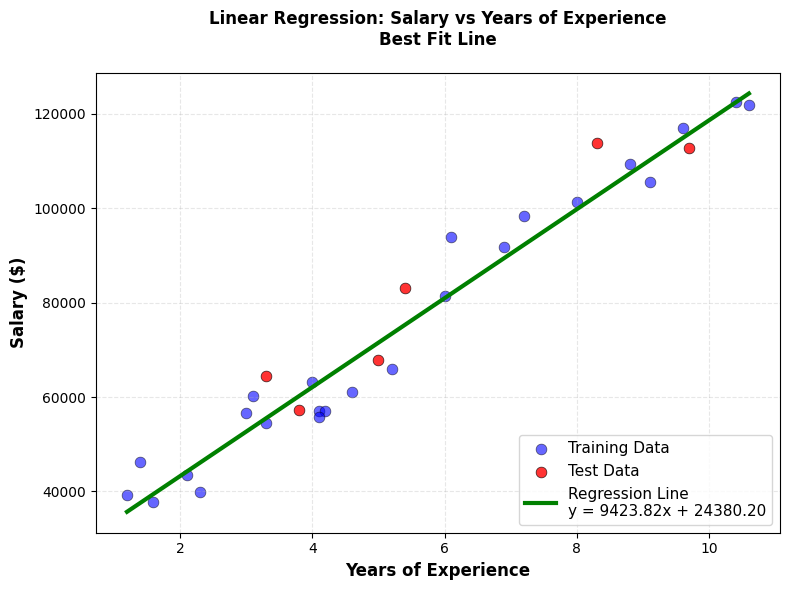

In [20]:
# Create the plot
plt.figure(figsize=(8, 6))

# Plot the training data points
plt.scatter(X_train, y_train, color='blue', alpha=0.6, s=60, 
           label='Training Data', edgecolors='black', linewidth=0.5)

# Plot the test data points
plt.scatter(X_test, y_test, color='red', alpha=0.8, s=60, 
           label='Test Data', edgecolors='black', linewidth=0.5)

# Regression line
x_range = np.linspace(X.min().values[0], X.max().values[0], 100)
y_range = model.predict(x_range.reshape(-1, 1))

# Plot the regression line
plt.plot(x_range, y_range, color='green', linewidth=3, 
         label=f'Regression Line\ny = {coefficient:.2f}x + {intercept:.2f}')

# plot
plt.xlabel('Years of Experience', fontsize=12, fontweight='bold')
plt.ylabel('Salary ($)', fontsize=12, fontweight='bold')
plt.title('Linear Regression: Salary vs Years of Experience\nBest Fit Line', fontsize=12, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='lower right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

#### Question 12:
Predict the target variable value

In [21]:
# Predict the target variable
print("Predictions:")
print("="*60)

# predictions on test set
test_predictions = model.predict(X_test)

# Display predictions vs actual values
print(f"{'Experience':<12} {'Actual':<12} {'Predicted':<12} {'Difference':<12}")
print("-" * 60)
for i in range(len(X_test)):
    exp = X_test.iloc[i, 0]
    actual = y_test.iloc[i]
    predicted = test_predictions[i]
    difference = abs(actual - predicted)
    print(f"{exp:.1f} | ${actual:8.0f} | ${predicted:8,.0f} | ${difference:8,.0f}")


Predictions:
Experience   Actual       Predicted    Difference  
------------------------------------------------------------
9.7 | $  112636 | $ 115,791 | $   3,155
5.0 | $   67939 | $  71,499 | $   3,560
8.3 | $  113813 | $ 102,598 | $  11,215
5.4 | $   83089 | $  75,269 | $   7,820
3.3 | $   64446 | $  55,479 | $   8,967
3.8 | $   57190 | $  60,191 | $   3,001


#### Question 13:
Display the actual and predicted target variable values

In [22]:
# ctual vs predicted values
print("Actual vs Predicted Salary Values:")
print("="*50)
print(f"{'Experience':<12} {'Actual':<12} {'Predicted':<12} {'Difference':<12}")
print("-" * 50)

for i in range(len(X_test)):
    experience = X_test.iloc[i, 0]
    actual = y_test.iloc[i]
    predicted = test_predictions[i]
    difference = abs(actual - predicted)
    print(f"{experience:<12.1f} ${actual:<11,.0f} ${predicted:<11,.0f} ${difference:<11,.0f}")

# Summary
print(f"\nSummary:")
print(f"Total predictions: {len(test_predictions)}")
print(f"Average error: ${abs(y_test - test_predictions).mean():,.0f}")


Actual vs Predicted Salary Values:
Experience   Actual       Predicted    Difference  
--------------------------------------------------
9.7          $112,636     $115,791     $3,155      
5.0          $67,939      $71,499      $3,560      
8.3          $113,813     $102,598     $11,215     
5.4          $83,089      $75,269      $7,820      
3.3          $64,446      $55,479      $8,967      
3.8          $57,190      $60,191      $3,001      

Summary:
Total predictions: 6
Average error: $6,286


In [23]:
#REGRESSION METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Question 14:
Calculate the Mean Absolute Error (MAE)

In [24]:
# Calculate MAE
mae = mean_absolute_error(y_test, test_predictions)

print(f"Mean Absolute Error (MAE): ${mae:,.2f}")


Mean Absolute Error (MAE): $6,286.45


#### Question 15:
Calculate the Root Mean Square Error (RMSE)

In [25]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"Root Mean Square Error (RMSE): ${rmse:,.2f}")

Root Mean Square Error (RMSE): $7,059.04


#### Question 16:
Calculate the R2 score

In [26]:
# Calculate R2 score
r2 = r2_score(y_test, test_predictions)

print(f"R2 Score: {r2:.4f}")


R2 Score: 0.9024


### LASSO,RIDGE REGRESSION

In [27]:
from sklearn.linear_model import Ridge, Lasso

#### Question 17:
Fit and build the Lasso and Ridge regression model, alpha can be used as 1.0

In [28]:
# Build Lasso Regression Model
print("Lasso Regression Model:")
print("="*35)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Lasso predictions
lasso_predictions = lasso_model.predict(X_test)

print(f"Lasso Model Parameters:")
print(f"Coefficient: {lasso_model.coef_[0]:.2f}")
print(f"Intercept: {lasso_model.intercept_:.2f}")

Lasso Regression Model:
Lasso Model Parameters:
Coefficient: 9423.69
Intercept: 24380.84


In [29]:
# Ridge Regression Model
print(f"\nRidge Regression Model:")
print("="*35)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Ridge predictions
ridge_predictions = ridge_model.predict(X_test)

print(f"Ridge Model Parameters:")
print(f"Coefficient: {ridge_model.coef_[0]:.2f}")
print(f"Intercept: {ridge_model.intercept_:.2f}")


Ridge Regression Model:
Ridge Model Parameters:
Coefficient: 9376.75
Intercept: 24629.06


#### Question 18:
Display the R2 score for linear regression, ridge and lasso regression models built above

In [30]:
# R2 scores for all models
linear_r2 = r2_score(y_test, test_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

# R2 scores
print("R2 Score Comparison:")
print("="*25)
print(f"Linear Regression R2: {linear_r2:.4f}")
print(f"Lasso Regression R2:  {lasso_r2:.4f}")
print(f"Ridge Regression R2:  {ridge_r2:.4f}")

# Best model
best_model = max([
    ("Linear", linear_r2),
    ("Lasso", lasso_r2),
    ("Ridge", ridge_r2)
], key=lambda x: x[1])

print(f"\nBest Model: {best_model[0]} (R2 = {best_model[1]:.4f})")


R2 Score Comparison:
Linear Regression R2: 0.9024
Lasso Regression R2:  0.9024
Ridge Regression R2:  0.9022

Best Model: Linear (R2 = 0.9024)
